# Recognising Handwriting Digits on MNIST Dataset using KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.shape

(42000, 785)

In [5]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = df.values

In [8]:
x= data[:, 1:]
y = data[:, 0]

In [9]:
x.shape

(42000, 784)

In [10]:
# train test split
split = int(0.8*x.shape[0])
x_train = x[:split, :]
x_test = x[split:, :]
y_test = y[split:]
y_train = y[:split]


In [11]:
# visualize sample

In [12]:
def drawImage(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')

1


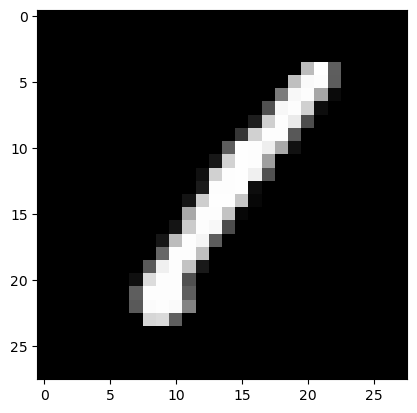

In [13]:
drawImage(x_train[0])
print(y_train[0])

In [14]:
def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))
# KNN Algorithm
acc = []
def knn(x, y,querypoint, k = 5):
    vals = []
    for i in range(x.shape[0]):
        d  =distance(querypoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = np.array(vals)
    new_val = np.unique(vals[1], return_counts = True)
    print(new_val)
    index = new_val[1].argmax()
    pred = new_val[0][index]
    return pred

In [15]:
# Make predictions
y_pred = knn(x_train, y_train, x_test[1])

(array([   7.        , 1150.19346199]), array([1, 1], dtype=int64))


In [16]:
y_test[1]

7

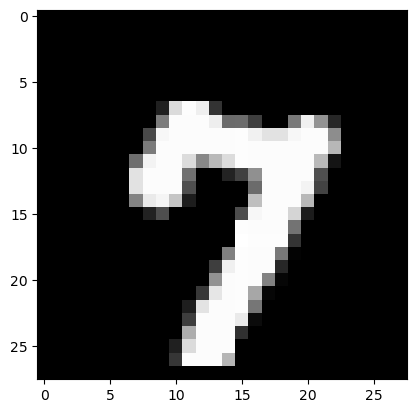

In [17]:
drawImage(x_test[1])

In [54]:
def get_accuracy(x_test, y_test):
    pred = []
    for i in range(x_test.shape[0]):
        pred.append(knn(x_train, y_train, x_test[i]))
    pred = np.array(pred)
    return float((pred == y_test).sum()) / x_test.shape[0]
    
    

In [62]:
print(get_accuracy(x_test, y_test))

(array([   0.        , 1235.20322215]), array([1, 1], dtype=int64))
(array([   7.        , 1150.19346199]), array([1, 1], dtype=int64))
(array([  7.        , 804.23131001]), array([1, 1], dtype=int64))
(array([   2.       , 1571.6459525]), array([1, 1], dtype=int64))
(array([   2.        , 1442.46629077]), array([1, 1], dtype=int64))
(array([  6.        , 997.03460321]), array([1, 1], dtype=int64))
(array([   5.        , 1291.48015858]), array([1, 1], dtype=int64))
(array([  7.        , 693.96469651]), array([1, 1], dtype=int64))
(array([   8.        , 1640.90523797]), array([1, 1], dtype=int64))
(array([   5.        , 1742.12858308]), array([1, 1], dtype=int64))
(array([   3.        , 1682.28000048]), array([1, 1], dtype=int64))
(array([  0.        , 994.21677717]), array([1, 1], dtype=int64))
(array([   2.      , 1457.252895]), array([1, 1], dtype=int64))
(array([   7.        , 1142.36859201]), array([1, 1], dtype=int64))
(array([   6.        , 1078.20081617]), array([1, 1], dtype=in